In [3]:
# from xerparser.reader import Reader
import pandas as pd
import numpy as np
from icecream import ic

In [1]:
PATH = "../../Documents/cee240_p6/CEE240F22_A.xlsx"

# Durations

In [111]:
df = pd.read_excel(PATH, sheet_name=0, engine="openpyxl", skiprows=[1] )
# rename columns to be easier to access
df.rename(columns={"target_drtn_hr_cnt": "duration", "total_float_hr_cnt": "float"}, inplace=True)
df.head(3)

/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,task_code,status_code,wbs_id,float,end_date,start_date,duration,task_name,delete_record_flag
0,P1B1000,Not Started,CEE240F22.Inc01,45,2022-09-01 08:00:00,2022-09-01 08:00:00,0,NTP,NaN
1,P1B1010,Not Started,CEE240F22.Inc01,45,2022-09-01 16:00:00,2022-09-01 08:00:00,1,submit shut down request for facilities,NaN
2,P1B1020,Not Started,CEE240F22.Inc01,45,2022-09-05 16:00:00,2022-09-02 08:00:00,2,"demo ceilings GL 6.5, M.4",NaN


<AxesSubplot: >

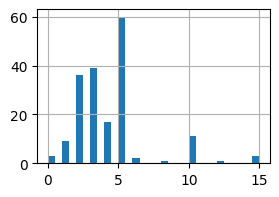

In [113]:
df.duration.hist(bins=30, figsize=(3,2))

<AxesSubplot: >

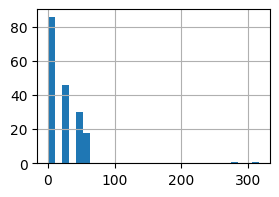

In [48]:
df.float.hist(bins=30, figsize=(3,2))

In [114]:
def adjust_dur(row):
    "used in an apply function with the df whose columns matches the row selections"
    if row.float <=50 and row.duration > 1:
        return np.round(row.duration - 1)
    elif row.duration > 15:
        return row.duration - 2
    elif row.duration > 5:
        return row.duration -1
    else:
        return row.duration
            

## edit durations

In [115]:
before = df["duration"].sum()
df["duration"] = df.apply(lambda row: adjust_dur(row), axis=1)
after = df["duration"].sum()
ic(before, after)
ic(df["duration"].unique())

ic| before: 753, after: 602
ic| df["duration"].unique(): array([ 0,  1,  2,  3,  7, 11,  9,  4, 14,  5])


array([ 0,  1,  2,  3,  7, 11,  9,  4, 14,  5])

<AxesSubplot: >

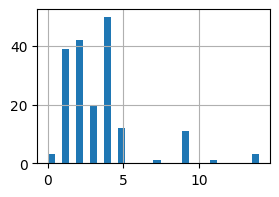

In [116]:
df.duration.hist(bins=30, figsize=(3,2))

# Export 

## modificiations

In [117]:
df00 = pd.read_excel(PATH, sheet_name=0, engine="openpyxl", )
# give original columns 
new_col = { k:v for (k,v) in zip(df.columns, df00.columns)} 
df.rename(columns=new_col, inplace=True)

# give original headings 
df.loc[-1] = df00.loc[0] 
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index
df.head(10)


/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,task_code,status_code,wbs_id,total_float_hr_cnt,end_date,start_date,target_drtn_hr_cnt,task_name,delete_record_flag
0,Activity ID,Activity Status,WBS Code,(*)Total Float(h),(*)Finish,(*)Start,Original Duration(h),Activity Name,Delete This Row
1,P1B1000,Not Started,CEE240F22.Inc01,45,2022-09-01 08:00:00,2022-09-01 08:00:00,0,NTP,NaN
2,P1B1010,Not Started,CEE240F22.Inc01,45,2022-09-01 16:00:00,2022-09-01 08:00:00,1,submit shut down request for facilities,NaN
3,P1B1020,Not Started,CEE240F22.Inc01,45,2022-09-05 16:00:00,2022-09-02 08:00:00,1,"demo ceilings GL 6.5, M.4",NaN
4,P1B1030,Not Started,CEE240F22.Inc01,0,2022-11-10 16:00:00,2022-11-08 08:00:00,2,"erect temp barrier, GL 6.5, M.4",NaN
5,P1B1040,Not Started,CEE240F22.Inc01,0,2022-11-15 16:00:00,2022-11-11 08:00:00,2,demo exterior walls GL 5.7 M,NaN
6,P1B1050,Not Started,CEE240F22.Inc01,0,2022-11-18 16:00:00,2022-11-16 08:00:00,2,demo interior walls GL 5.7 - 7.1 M.4,NaN
7,P1B1060,Not Started,CEE240F22.Inc01,0,2022-11-21 16:00:00,2022-11-21 08:00:00,1,"remove, salvage column covers, GL 7.1 M",NaN
8,P1B1070,Not Started,CEE240F22.Inc01,45,2022-09-05 16:00:00,2022-09-02 08:00:00,1,"demo ceilings 1L 7.1, M.4",NaN
9,P1B1080,Not Started,CEE240F22.Inc01,317,2022-11-24 16:00:00,2022-11-22 08:00:00,3,"remove, dispose 8"" san. sewer GL 5.7 D.4",NaN


In [118]:
# import other sheets to recreate original excel file 
df01 = pd.read_excel(PATH, sheet_name=1, engine="openpyxl" )
df02 = pd.read_excel(PATH, sheet_name=2, engine="openpyxl" )

/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/julietnwagwuume-ezeoke/CEE240local/cee240env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [119]:
# readable by P6

with pd.ExcelWriter("../../Documents/cee240_p6/OUT_CEE240F22_Nov13.xlsx") as writer: 
    df.to_excel(writer, sheet_name="TASK", index=False)
    df01.to_excel(writer, sheet_name="TASKPRED", index=False)
    df02.to_excel(writer, sheet_name="USERDATA", index=False)

In [120]:
df.head(10)

,task_code,status_code,wbs_id,total_float_hr_cnt,end_date,start_date,target_drtn_hr_cnt,task_name,delete_record_flag
0,Activity ID,Activity Status,WBS Code,(*)Total Float(h),(*)Finish,(*)Start,Original Duration(h),Activity Name,Delete This Row
1,P1B1000,Not Started,CEE240F22.Inc01,45,2022-09-01 08:00:00,2022-09-01 08:00:00,0,NTP,NaN
2,P1B1010,Not Started,CEE240F22.Inc01,45,2022-09-01 16:00:00,2022-09-01 08:00:00,1,submit shut down request for facilities,NaN
3,P1B1020,Not Started,CEE240F22.Inc01,45,2022-09-05 16:00:00,2022-09-02 08:00:00,1,"demo ceilings GL 6.5, M.4",NaN
4,P1B1030,Not Started,CEE240F22.Inc01,0,2022-11-10 16:00:00,2022-11-08 08:00:00,2,"erect temp barrier, GL 6.5, M.4",NaN
5,P1B1040,Not Started,CEE240F22.Inc01,0,2022-11-15 16:00:00,2022-11-11 08:00:00,2,demo exterior walls GL 5.7 M,NaN
6,P1B1050,Not Started,CEE240F22.Inc01,0,2022-11-18 16:00:00,2022-11-16 08:00:00,2,demo interior walls GL 5.7 - 7.1 M.4,NaN
7,P1B1060,Not Started,CEE240F22.Inc01,0,2022-11-21 16:00:00,2022-11-21 08:00:00,1,"remove, salvage column covers, GL 7.1 M",NaN
8,P1B1070,Not Started,CEE240F22.Inc01,45,2022-09-05 16:00:00,2022-09-02 08:00:00,1,"demo ceilings 1L 7.1, M.4",NaN
9,P1B1080,Not Started,CEE240F22.Inc01,317,2022-11-24 16:00:00,2022-11-22 08:00:00,3,"remove, dispose 8"" san. sewer GL 5.7 D.4",NaN


In [ ]:
# local write
with pd.ExcelWriter("outputs/OUT_CEE240F22_Nov13.xlsx") as writer: 
    df.to_excel(writer, sheet_name="TASK", index=False)
    df01.to_excel(writer, sheet_name="TASKPRED", index=False)
    df02.to_excel(writer, sheet_name="USERDATA", index=False)